In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#file path
csv_path = "../Resources/crime_data-33613.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,1045777,2018-105236,TRAFFIC,Non Incapacitating Injury,2/12/2018,BRUCE B DOWNS BL / GRAND PAVILION DR,33613
1,1043905,2018-87847,TRAFFIC,Property Damage,2/5/2018,BEARSS AV E / SOMERSET PARK DR,33613
2,1044927,2018-96192,BATTERY,BATTERY-SIMPLE,2/8/2018,1400 BLOCK 139TH AV E,33613
3,1044970,2018-95279,TRAFFIC,Property Damage,2/8/2018,FLETCHER AV E / BRUCE B DOWNS BL,33613
4,1050626,2018-154357,BATTERY,BATTERY-SIMPLE,3/3/2018,14500 BLOCK SEAFORD CR,33613
5,1051499,2018-163926,TRAFFIC,Non Incapacitating Injury,3/7/2018,BRUCE B DOWNS BL / 138TH AV E,33613
6,1051562,2018-163936,BATTERY,BATTERY-SIMPLE,3/7/2018,1900 BLOCK 136TH AV E,33613
7,1053437,2018-180768,TRAFFIC,Property Damage,3/14/2018,BEARSS AV W / HAVEN BN,33613
8,1047821,2018-126439,TRAFFIC,Property Damage,2/20/2018,BRUCE B DOWNS BL / COVE BEND DR,33613
9,1049627,2018-143157,THEFT,THEFT MOTOR VEHICLE PARTS,2/27/2018,1200 BLOCK SAND LAKE CR,33613


In [2]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [3]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,2/12/2018,2018-105236,TRAFFIC,Non Incapacitating Injury,33613
1,2/5/2018,2018-87847,TRAFFIC,Property Damage,33613
2,2/8/2018,2018-96192,BATTERY,BATTERY-SIMPLE,33613
3,2/8/2018,2018-95279,TRAFFIC,Property Damage,33613
4,3/3/2018,2018-154357,BATTERY,BATTERY-SIMPLE,33613
5,3/7/2018,2018-163926,TRAFFIC,Non Incapacitating Injury,33613
6,3/7/2018,2018-163936,BATTERY,BATTERY-SIMPLE,33613
7,3/14/2018,2018-180768,TRAFFIC,Property Damage,33613
8,2/20/2018,2018-126439,TRAFFIC,Property Damage,33613
9,2/27/2018,2018-143157,THEFT,THEFT MOTOR VEHICLE PARTS,33613


In [4]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df.head(10)


,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
2,2/8/2018,2018-96192,BATTERY,BATTERY-SIMPLE,33613
4,3/3/2018,2018-154357,BATTERY,BATTERY-SIMPLE,33613
6,3/7/2018,2018-163936,BATTERY,BATTERY-SIMPLE,33613
9,2/27/2018,2018-143157,THEFT,THEFT MOTOR VEHICLE PARTS,33613
13,4/23/2018,2018-279571,DRUGS,DRUGS/NARCOTICS,33613
15,4/6/2018,2018-238574,THEFT,SHOPLIFTING,33613
16,4/26/2018,2018-289572,DRUGS,DRUGS/NARCOTICS,33613
17,5/1/2018,2018-301327,BATTERY,BATTERY-SIMPLE,33613
18,4/11/2018,2018-251239,DRUGS,DRUGS/NARCOTICS,33613
19,4/11/2018,2018-251124,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,33613


In [5]:
#count all non traffic related crimes
data_crime_no_traffic_df["Case Number"].count()

758

In [6]:
#list of crimes and count
crime_type = data_crime_no_traffic_df.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ARSON         1
ASSAULT      13
BATTERY     170
BURGLARY     83
DRUGS        83
DUI          35
FIRE          1
FRAUD        75
HARASS        2
MISCHIEF     68
MURDER        2
ROBBERY      13
THEFT       212
Name: Case Number, dtype: int64

In [7]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
1/1/2019     1
1/1/2020     1
1/10/2019    1
1/10/2020    1
1/11/2019    1
            ..
9/6/2019     2
9/7/2019     1
9/7/2020     1
9/8/2018     1
9/9/2018     2
Name: Case Number, Length: 565, dtype: int64

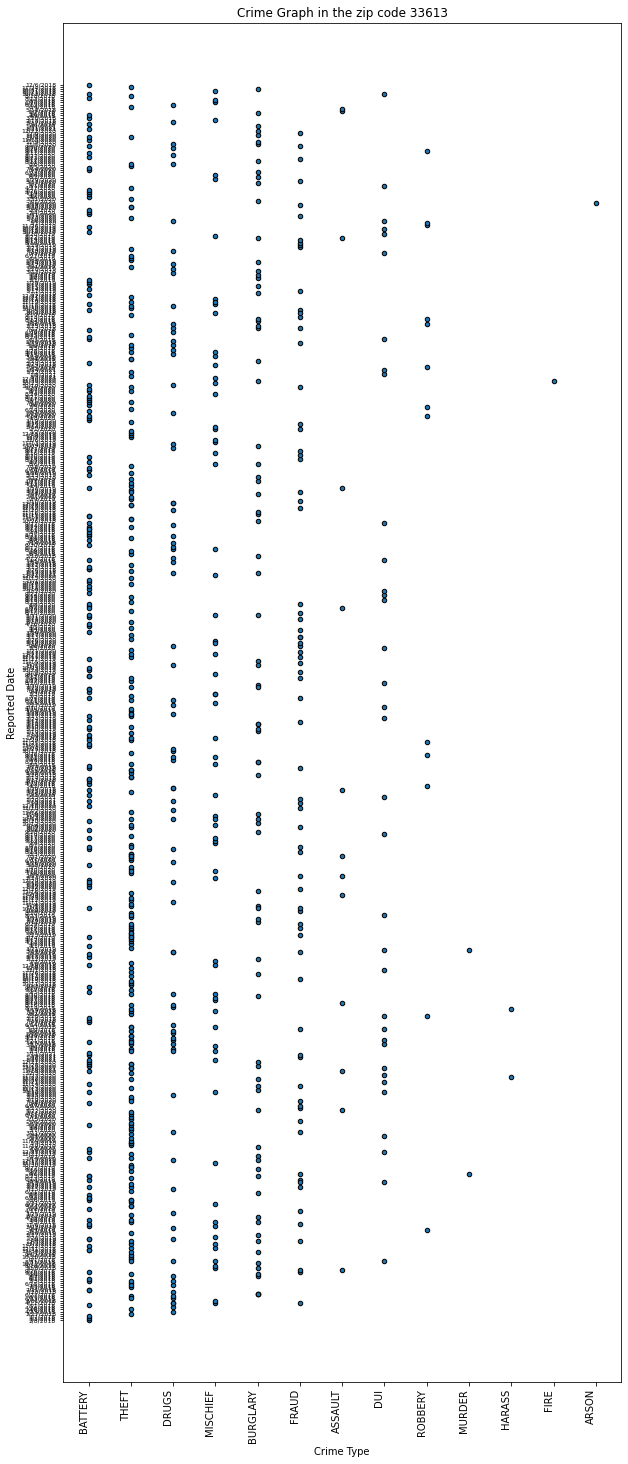

In [9]:
data_crime_no_traffic_df.plot(kind="scatter", x="Crime Type", y="Reported Date", figsize=(10,25),
                              facecolors="red", edgecolors="black", title="Crime Graph in the zip code 33613")
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right', fontweight='light', fontsize=6)
plt.show()